Node A
Node B


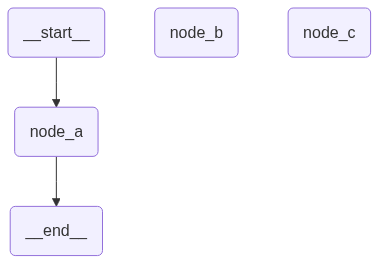

In [9]:
from langgraph.graph import StateGraph,END
from langgraph.types import Command
from typing import TypedDict

class State(TypedDict):
    text:str


def nodeA(state:State):
    print("Node A")
    return Command(
        goto="node_b",
        update={
            "text":state["text"]+"a"
        }
    )


def nodeB(state:State):
    print("Node B")
    return Command(
        goto=END,
        update={
            "text":state["text"]+"b"
        }
    )



def nodeC(state:State):
    print("Node C")
    return Command(
        goto=END,
        update={
            "text":state["text"]+"c"
        }
    )


# Dont have to add edge here we manage upwards
graph = StateGraph(State)
graph.add_node("node_a",nodeA)
graph.add_node("node_b",nodeB)
graph.add_node("node_c",nodeC)

graph.set_entry_point("node_a")

app = graph.compile()
response = app.invoke({
    "text":""
})
app